In [104]:
import numpy as np
from sympy import *
import Slides.presentation_helper as ph
import Slides.math_helper as mh

In [105]:
distance_standard = 1e-10
avogadro = 6.02214179e23
g2Kg = 1e-3
g_mol2Kg = g2Kg / avogadro
mass_standard = g_mol2Kg
boltzmann = 1.3806503e-23
cal2Joule = 4.184
kcal2Joule = 1e3 * cal2Joule
kcal_mol2Joule = kcal2Joule / avogadro
energy_standard = kcal_mol2Joule
time_standard = 1e-15
temperature_standard = 1.
force_standard = energy_standard / distance_standard
velocity_standard = distance_standard / time_standard
ft_m2v = (force_standard * time_standard / mass_standard) / velocity_standard
mvv2e = mass_standard * velocity_standard ** 2 / energy_standard

In [106]:
r0, lattice_size, sigma, epsilon, r, m, dr = symbols(r'r0 A  sigma epsilon r m dr', real=True, positive=True)
X, F, j, strain = symbols(r'X F j \nabla~u', real=True)
z = Function('\zeta')

In [107]:
app_num = {
    r0: 1.23157195294235, # angstrom
    z(6): 1 + Rational(1, 2)**6,
    z(12): 1 + Rational(1, 2)**12,
    sigma: 1.1, # angstrom
    epsilon: 1.6567944e-21/6.94769e-21, # kcal.mol^-1
    m : 39.95 # g.mol^-1
}

In [165]:
lj = 4*epsilon*((sigma/r)**12-(sigma/r)**6)

4*epsilon*(-sigma**6/r**6 + sigma**12/r**12)


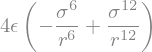

In [175]:
print(lj)
lj

24*epsilon*sigma**6*(r**6 - 2*sigma**6)/r**13


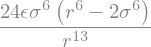

In [167]:
ljp = simplify(diff(lj, r))
print(str(ljp))
ljp

24*epsilon*sigma**6*(-7*r**6 + 26*sigma**6)/r**14


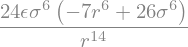

In [174]:
ljpp = simplify(diff(ljp, r))
print(str(ljpp))
ljpp

In [170]:
sol = solve(simplify(ljp + ljp.subs(r, 2*r)*2), r)
simplify(sol[0]).subs(app_num).evalf()

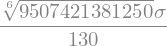

In [171]:
sol[0]

In [172]:
(2*z(12)/z(6)).subs(app_num).evalf()

In [173]:
9507421381250/130**6

In [115]:
density = m/r0
simplify(density)

La densité d'énergie est:

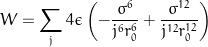

In [116]:
mh.print_latex(r'W = \sum_j {0}', lj.subs(r, r0*j))

Pour un gradient de déformation uniforme, en 1D, on obtient $r_j = F X_j = F r_0 j$ et donc:

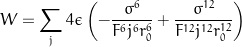

In [117]:
mh.print_latex(r'W = \sum_j {0}', lj.subs(r, F*r0*j))

Le stress est la variation de $W$ par rapport a $F$ divisée par le volume

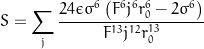

In [118]:
S = diff(lj.subs(r, F*r0*j), F)/r0
mh.print_latex(r'S = \sum_j {0}', simplify(S))

Le module d'élasticité est la variation de $S$ par rapport a $F$ a l'origine ($F = I$)

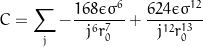

In [119]:
stiffness = diff(S, F).subs(F,1)
mh.print_latex(r'C = \sum_j {0}', simplify(stiffness))

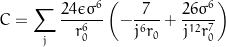

In [120]:
_f = 24*epsilon*(sigma/r0)**6
mh.print_latex(r'C = \sum_j {0} \left( {1} \right)', _f, simplify(stiffness/_f))

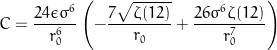

In [121]:
_f = 24*epsilon*(sigma/r0)**6
mh.print_latex(r'C = {0} \left( {1} \right)', _f, simplify(stiffness/_f).subs(1/j**12, z(12)).subs(1/j**6, z(6)))

Du coup la vitesse des ondes est $c = \sqrt{C/\rho} = \sqrt{Cr_0/m}$

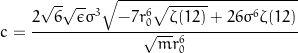

In [122]:
_f = 24*epsilon*(sigma/r0)**6
_g = simplify(stiffness/_f).subs(1/j**12, z(12)).subs(1/j**6, z(6))
mh.print_latex(r'c = {0}', simplify(sqrt(_f*_g*r0/m)))

Application numérique

In [123]:
c = sqrt(_f*_g*r0/m)
c.subs(app_num).evalf()

In [124]:
rho = m/r0
rho.subs(app_num)

In [125]:
(_f*_g).subs(app_num).evalf()

In [126]:
beta = Symbol(r'\beta', positive=True)
U = Function('U')

In [127]:
exp(-beta*U(r))

In [128]:
boltz = exp(-beta*U(r))
boltz

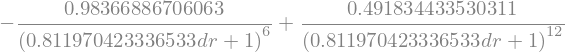

In [138]:
_U = 2*(lj + lj.subs(r, 2*r)).subs(r, r0+dr).subs(app_num)
_U

In [139]:
__U = simplify(series(_U, dr, 0, 5).removeO()).evalf()
__U._args

In [152]:
c = __U._args[2]/dr**2
g = __U._args[4]/dr**3
alpha = -3*g/4/c**2*boltzmann/kcal_mol2Joule
alpha

In [153]:
c, g

In [154]:
alpha*100

In [155]:
(r0*(1+alpha*100)).subs(app_num)

In [179]:
2*(lj.subs(r, r0) + lj.subs(r, 2*r0)).subs(app_num)*99